Script below: From a sequencing library for a gene, compute p(m,u) at each base pair. 

Code below calculates using mean expression data, expression defined as mRNA counts. 

In [1]:
import numpy as np
import pandas as pd

DATDIR = "./data/expression_data"
# data = pd.read_csv(f"{DATDIR}/ykgE_dataset_combined.csv")
data = pd.read_csv(f"{DATDIR}/ykgEM9dataset_alldone_with_large", sep='\\s+')


wt = 'TCGATTTCCCCATAAAATGTGAGCGATGCCGAAAGAAATAAAATTAGTTATTGCATTTGACGTTTGGATGAAAGATTATCATTTGTCATACAAATGAGGGGTGGTATGTTGCTAGCCAATTAAAAAAGAACGCCATATTTATTGATGATTGATCCCCCGG'

n = len(wt) #length of each sequence
m = len(data.iloc[:, 0]) #number of sequences 
p = np.zeros((n, 2, 2))
print(data)
it 
mu_mean = np.zeros(n) #entry j is the mean expression when position j is wildtype
count = np.zeros(n) #entry j is the number of barcodes with wildtype at position j
for j in range(n):
    for i in range(m):
        if wt[j] == data.iloc[i].values[3][j]:
            mu_mean[j] += data['ct_1'][i]/data['ct'][i] 
            count[j] += 1
            
for j in range(n):
    mu_mean[j] = mu_mean[j]/count[j]
print(mu_mean)
for j in range(n):
    for i in range(m):
        if wt[j] == data.iloc[i].values[3][j]:
            if data['ct_1'][i]/data['ct'][i]  > mu_mean[j]:
                p[j][0][1] +=  1/m # p(m = 0, \mu = 1)
            else:
                p[j][0][0] +=  1/m # p(m = 0, \mu = 0)
            
        else:
            if data['ct_1'][i]/data['ct'][i] > mu_mean[j]:
                p[j][1][1] +=  1/m # p(m = 1, \mu = 1)
            else:
                p[j][1][0] +=  1/m # p(m = 1, \mu = 0)
            
I = np.zeros(n)

for i in range(n):
    I[i] = p[i][0][0]*np.log2(p[i][0][0]/((p[i][0][0] + p[i][0][1])*(p[i][0][0] + p[i][1][0]))) #add p(0,0)*log_2(p(0,0)/(p_m(0)*p_mu(0)))
    I[i] += p[i][1][0]*np.log2(p[i][1][0]/((p[i][1][0] + p[i][1][1])*(p[i][0][0] + p[i][1][0]))) #add p(1,0)*log_2(p(1,0)/(p_m(1)*p_mu(0)))
    I[i] += p[i][0][1]*np.log2(p[i][0][1]/((p[i][0][0] + p[i][0][1])*(p[i][0][1] + p[i][1][1]))) #add p(0,1)*log_2(p(0,1)/(p_m(0)*p_mu(1)))
    I[i] += p[i][1][1]*np.log2(p[i][1][1]/((p[i][1][0] + p[i][1][1])*(p[i][0][1] + p[i][1][1]))) #add p(0,0)*log_2(p(0,0)/(p_m(0)*p_mu(0)))
    
print(p)
for i in range(n):
    if p[i][1][1] < p[i][1][0]:
        I[i] = - I[i]
I

       ct  ct_0  ct_1                                                seq
0     1.0   0.0   1.0  ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
1     4.0   1.0   3.0  ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
2     1.0   0.0   1.0  ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
3     2.0   0.0   2.0  ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
4     4.0   1.0   3.0  ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
...   ...   ...   ...                                                ...
3723  1.0   0.0   1.0  TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...
3724  1.0   1.0   0.0  TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...
3725  1.0   1.0   0.0  TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...
3726  3.0   0.0   3.0  TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...
3727  9.0   1.0   8.0  TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...

[3728 rows x 4 columns]
[0.7727134  0.77602999 0.77541515 0.77534131 0.78402017 0.78182894
 0.78092457 0.77356938 0.7758637

array([5.99707868e-05, 1.14923503e-04, 2.39953586e-05, 1.34010790e-05,
       1.66362012e-03, 1.48987108e-03, 1.07474519e-03, 7.82704602e-05,
       5.13283860e-06, 1.97488458e-04, 1.55689727e-06, 1.15140688e-07,
       1.14478847e-04, 1.96874590e-04, 5.10853522e-08, 2.74242645e-04,
       7.83273208e-04, 1.53211858e-03, 8.27720865e-04, 1.59426012e-03,
       3.92461819e-04, 4.59202123e-04, 2.01861936e-04, 1.48351398e-04,
       1.05833572e-06, 5.87357696e-04, 2.61840580e-04, 1.40019869e-04,
       1.66107615e-04, 1.92993140e-06, 6.32516010e-06, 1.28269060e-04,
       3.54653205e-05, 8.86795421e-04, 2.63643689e-04, 4.97448334e-05,
       1.15484371e-07, 3.45317092e-04, 6.01955976e-04, 1.45124641e-04,
       1.57355771e-05, 2.12002952e-04, 1.03296170e-03, 6.44257718e-04,
       3.26108616e-04, 6.43455361e-04, 1.10820002e-05, 2.33246160e-05,
       7.11556765e-05, 6.86038273e-04, 1.99108508e-03, 3.60781608e-03,
       1.15983646e-03, 1.41987363e-03, 3.06604480e-05, 8.64485025e-05,
      

([<matplotlib.axis.XTick at 0x12113c980>,
 [Text(0.0, 0, '46'),
  Text(10.062893081761006, 0, '35'),
  Text(20.12578616352201, 0, '25'),
  Text(30.18867924528302, 0, '15'),
  Text(40.25157232704402, 0, '5'),
  Text(50.314465408805034, 0, '-4'),
  Text(60.37735849056604, 0, '-14'),
  Text(70.44025157232704, 0, '-24'),
  Text(80.50314465408805, 0, '-34'),
  Text(90.56603773584905, 0, '-44'),
  Text(100.62893081761007, 0, '-54'),
  Text(110.69182389937107, 0, '-64'),
  Text(120.75471698113208, 0, '-74'),
  Text(130.8176100628931, 0, '-84'),
  Text(140.88050314465409, 0, '-94'),
  Text(150.9433962264151, 0, '-104')])

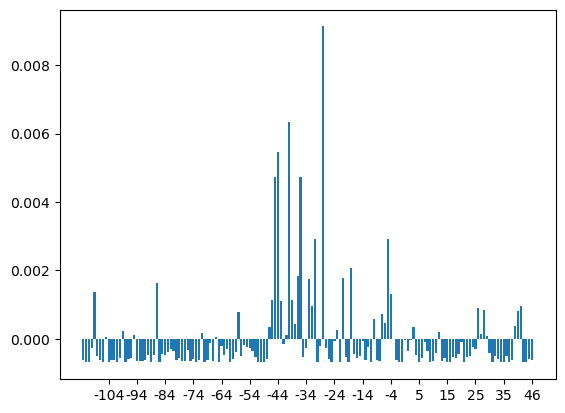

In [2]:
import matplotlib.pyplot as plt

I_mean = np.mean(I)
for i in range(n):
    I[i] = I[i] - I_mean
x = np.linspace(0,n,n)
plt.bar(x, I)
plt.gca().invert_xaxis()


new_labels = np.linspace(46, -114, len(x))
plt.xticks(x[::10], new_labels[::10].astype(int))


#plt.ylim(0,5e-3)

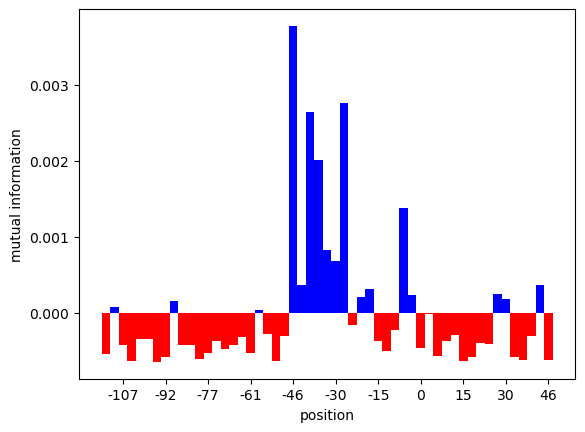

In [3]:
# Bin the data with a bin size of 10
bin_size = 3
num_bins = n // bin_size
binned_I = [np.mean(I[i*bin_size:(i+1)*bin_size]) for i in range(num_bins)]

# Generate x values for binned data
x = np.arange(num_bins) * bin_size

# Create the bar plot for binned data
colors = ['red' if value < 0 else 'blue' for value in binned_I]
plt.bar(x, binned_I, width=bin_size, color=colors)

# Invert the x-axis
plt.gca().invert_xaxis()

# Set the x-axis labels to range from -114 to 46
new_labels = np.linspace(46, -114, num_bins)

# Show one of every 10 ticks with integer values
plt.xticks(x[::5], new_labels[::5].astype(int))

# Set y-axis limit
#plt.ylim(0, 1e-2)
plt.xlabel('position')
plt.ylabel('mutual information')

# Show the plot
plt.show()

New Stuff


In [4]:
#I want to compute expression shift at each base pair

import numpy as np
import pandas as pd


n = len(wt) #length of each sequence
m = len(data.iloc[:, 0]) #number of sequences 
print(data)

mu_mean = np.zeros(n) #entry j is the mean expression when position j is wildtype
count = np.zeros(n) #entry j is the number of barcodes with wildtype at position j
for j in range(n):
    for i in range(m):
        if wt[j] == data.iloc[i].values[3][j]:
            mu_mean[j] += data['ct_1'][i]/data['ct'][i] 
            count[j] += 1
            
for j in range(n):
    mu_mean[j] = mu_mean[j]/count[j]
    
xi = np.zeros(n)

count = np.zeros(n)
for j in range(n):
    for i in range(m):
        if wt[j] != data.iloc[i].values[3][j]: #if is not wildtype
            xi[j] += data['ct_1'][i]/data['ct'][i] - mu_mean[j]
            count[j] += 1
            
for j in range(n):
    xi[j] = xi[j]/count[j]
            

            


       ct  ct_0  ct_1                                                seq
0     1.0   0.0   1.0  ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
1     4.0   1.0   3.0  ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
2     1.0   0.0   1.0  ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
3     2.0   0.0   2.0  ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
4     4.0   1.0   3.0  ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
...   ...   ...   ...                                                ...
3723  1.0   0.0   1.0  TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...
3724  1.0   1.0   0.0  TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...
3725  1.0   1.0   0.0  TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...
3726  3.0   0.0   3.0  TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...
3727  9.0   1.0   8.0  TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...

[3728 rows x 4 columns]


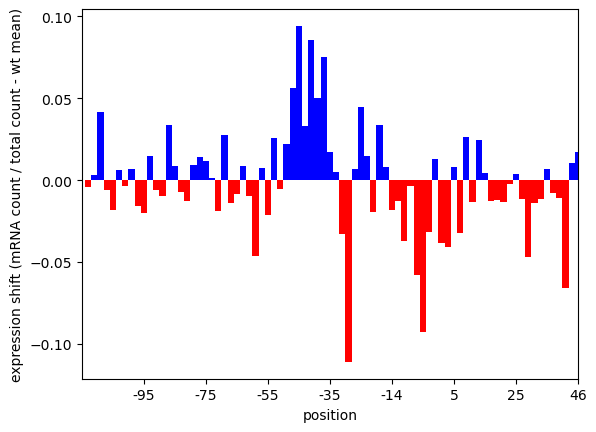

In [5]:
#plot expression shift

import matplotlib.pyplot as plt


x = np.linspace(0,n,n)



# Bin the data with a bin size of 10
bin_size = 2
num_bins = n // bin_size
binned_xi = [np.mean(xi[i*bin_size:(i+1)*bin_size]) for i in range(num_bins)]

# Generate x values for binned data
x = np.arange(num_bins) * bin_size

# Create the bar plot for binned data
colors = ['red' if value < 0 else 'blue' for value in binned_xi]
plt.bar(x, binned_xi, width=bin_size, color=colors)



# Set the x-axis labels to range from -114 to 46
new_labels = np.linspace(46, -114, num_bins)

# Show one of every 10 ticks with integer values
plt.xticks(x[::10], new_labels[::10].astype(int))

# Set y-axis limit
#plt.ylim(0, 1e-2)
plt.xlabel('position')
plt.xlim(0,160)
# Invert the x-axis
plt.gca().invert_xaxis()
plt.ylabel('expression shift (mRNA count / total count - wt mean)')

# Show the plot
plt.show()

Next, find this for points. Gamma is a function Gamma(j, m), where $j \leq N/2$ is the point and $m \in \{0, 0.5, 1\}$ is the mutation level. Really, Gamma(j, 0) = 0, Gamma(j, 0.5) = [exp shift^2(a mutated, b not) + exp shift^2(a not, b mutated)]/2. Gamma(j, 1) = exp shift^2(a mutated, b mutated). Here, a and b are the two basepairs within point j. 

In [6]:


import numpy as np
import pandas as pd



# data = pd.read_csv('ykgE_dataset_combined.csv')

wt = 'TCGATTTCCCCATAAAATGTGAGCGATGCCGAAAGAAATAAAATTAGTTATTGCATTTGACGTTTGGATGAAAGATTATCATTTGTCATACAAATGAGGGGTGGTATGTTGCTAGCCAATTAAAAAAGAACGCCATATTTATTGATGATTGATCCCCCGG'


n = len(wt) #length of each sequence
n1 = int(n/2)
m = len(data.iloc[:, 0]) #number of sequences 

Gamma = np.zeros((n1, 3))

#First, compute the second column of Gamma

mean = np.zeros(n1) #entry j is the mean expression when position j is wildtype
count = np.zeros(n1) #entry j is the number of barcodes with wildtype at position j
for j in range(n1):
    for i in range(m):
        if wt[2*j] == data.iloc[i].values[3][2*j] and wt[2*j + 1] == data.iloc[i].values[3][2*j + 1]:
            mean[j] += data['ct_1'][i]/data['ct'][i] 
            count[j] += 1
            
for j in range(n1):  
    mean[j] = mean[j]/count[j] #mean expression, assuming a, b both wild type.
    
shift_a = np.zeros(n1) #expression assuming a mutated and b not
shift_b = np.zeros(n1) #expression assuming a not and b mutated
shift_ab = np.zeros(n1) #expression assuming a mutated and b mutated

counta = np.zeros(n1)
countb = np.zeros(n1)
countab = np.zeros(n1)
for j in range(n1):
    for i in range(m):
        if wt[2*j] != data.iloc[i].values[3][2*j] and wt[2*j + 1] == data.iloc[i].values[3][2*j + 1]:
            shift_a[j] += data['ct_1'][i]/data['ct'][i] 
            counta[j] += 1
        if wt[2*j] == data.iloc[i].values[3][2*j] and wt[2*j + 1] != data.iloc[i].values[3][2*j + 1]:
            shift_b[j] += data['ct_1'][i]/data['ct'][i] 
            countb[j] += 1
        if wt[2*j] != data.iloc[i].values[3][2*j] and wt[2*j + 1] != data.iloc[i].values[3][2*j + 1]:
            shift_ab[j] += data['ct_1'][i]/data['ct'][i] 
            countab[j] += 1
            
for j in range(n1):
    Gamma[j][1] = (shift_a[j]/counta[j] - mean[j])**2/2 + (shift_b[j]/countb[j] - mean[j])**2/2
    Gamma[j][2] = (shift_ab[j]/countab[j] - mean[j])**2

print(Gamma)


[[0.00000000e+00 1.03362526e-03 4.89967096e-03]
 [0.00000000e+00 7.14303519e-04 2.92172387e-02]
 [0.00000000e+00 3.58943556e-03 3.68180669e-02]
 [0.00000000e+00 1.61598172e-03 2.11817863e-04]
 [0.00000000e+00 3.95847746e-04 3.28881502e-04]
 [0.00000000e+00 2.73266012e-04 4.80098740e-04]
 [0.00000000e+00 2.12997758e-03 5.31024743e-03]
 [0.00000000e+00 2.72293729e-04 2.14064275e-02]
 [0.00000000e+00 2.99180975e-03 1.29330189e-03]
 [0.00000000e+00 3.16937784e-03 1.33663665e-03]
 [0.00000000e+00 1.50533832e-03 8.59912889e-03]
 [0.00000000e+00 1.16748981e-03 1.98036316e-02]
 [0.00000000e+00 8.08611979e-04 5.18823409e-03]
 [0.00000000e+00 2.29394124e-04 4.38349161e-03]
 [0.00000000e+00 6.36930506e-04 2.36264748e-03]
 [0.00000000e+00 1.00723663e-04 5.33030863e-04]
 [0.00000000e+00 8.68989382e-04 2.86009054e-03]
 [0.00000000e+00 7.16011356e-04 3.10283754e-03]
 [0.00000000e+00 1.53093390e-03 2.52006676e-03]
 [0.00000000e+00 1.50752614e-03 5.15405560e-04]
 [0.00000000e+00 6.62665053e-05 3.357459

In [7]:
print(counta) #number of cases where, at the jth point, a is mutated and b is not
print(countb) #number of cases where, at the jth point, b is mutated and a is not
print(countab) #number of cases where, at the jth point, a and b are both mutated

[434. 345. 385. 311. 342. 365. 365. 288. 358. 302. 382. 422. 344. 295.
 255. 356. 435. 251. 396. 332. 322. 372. 235. 360. 438. 287. 297. 317.
 344. 323. 289. 285. 313. 360. 279. 305. 425. 293. 324. 318. 370. 389.
 308. 370. 375. 450. 370. 393. 355. 334. 283. 292. 327. 257. 370. 343.
 428. 345. 291. 358. 374. 338. 343. 339. 367. 343. 286. 409. 339. 363.
 406. 274. 453. 298. 331. 358. 379. 293. 404. 363.]
[276. 353. 282. 378. 269. 379. 293. 413. 387. 386. 336. 257. 341. 440.
 330. 411. 370. 282. 365. 337. 413. 301. 356. 335. 289. 242. 357. 436.
 362. 259. 352. 308. 395. 369. 339. 322. 340. 261. 318. 253. 281. 353.
 452. 483. 460. 400. 377. 365. 333. 289. 322. 377. 369. 344. 293. 306.
 414. 357. 387. 339. 398. 354. 303. 309. 436. 343. 427. 359. 335. 276.
 329. 335. 342. 286. 299. 341. 280. 346. 270. 282.]
[38. 25. 32. 36. 48. 50. 71. 33. 21. 43. 53. 40. 39. 38. 34. 30. 47. 32.
 38. 31. 39. 44. 25. 49.  9. 38. 38. 42. 42. 46. 18. 38. 34. 27. 27. 30.
 52. 28. 43. 55. 30. 57. 53. 28. 71. 50.